## Final Project Submission

Please fill out:
* Student name: Zhiqiang Sun
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## The Project
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

Student name: Zhiqiang Sun
Student pace: self paced 
Scheduled project review date/time: 
Instructor name: Jeff Herman

Blog post URL

In [3]:
#import all necessary library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import all the data to dataframe from the given database

import pandas as pd
 

bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

rt_movie_info  = pd.read_csv("rt.movie_info.tsv",  encoding= 'unicode_escape', sep='\t')
rt_reviews = pd.read_csv("rt.reviews.tsv", encoding= 'unicode_escape', sep='\t')

IMDB_name_base = pd.read_csv('name.basics.csv')
IMDB_akas = pd.read_csv('title.akas.csv')
IMDB_basics = pd.read_csv('title.basics.csv')
IMDB_crew = pd.read_csv('title.crew.csv')
IMDB_principals = pd.read_csv('title.principals.csv')
IMDB_rating = pd.read_csv('title.ratings.csv')

tmdb_movies = pd.read_csv('tmdb.movies.csv')

tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [5]:
print('bom_movie_gross', len(bom_movie_gross), bom_movie_gross.columns)
print('rt_movie_info', len(rt_movie_info), rt_movie_info.columns)
print('rt_reviews', len(rt_reviews), rt_reviews.columns)
print('IMDB_name_base', len(IMDB_name_base), IMDB_name_base.columns)
print('IMDB_akas', len(IMDB_akas), IMDB_akas.columns)
print('IMDB_basics', len(IMDB_basics), IMDB_basics.columns)
print('IMDB_crew', len(IMDB_crew), IMDB_crew.columns)
print('IMDB_principals', len(IMDB_principals), IMDB_principals.columns)
print('IMDB_rating', len(IMDB_rating), IMDB_rating.columns)
print('tmdb_movies', len(tmdb_movies), tmdb_movies.columns)
print('tn_movie_budgets', len(tn_movie_budgets), tn_movie_budgets.columns)



bom_movie_gross 3387 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
rt_movie_info 1560 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
rt_reviews 54432 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
IMDB_name_base 606648 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')
IMDB_akas 331703 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')
IMDB_basics 146144 Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
IMDB_crew 146144 Index(['tconst', 'directors', 'writers'], dtype='object')
IMDB_principals 1028186 Index(['tco

## Questions for the visulization graph
1. How does movie industry growth in these years. Print the graph of the domestic gross and foreign gross as well as the world gross for different years.
2. What is average rating as well as the gross earning for different category movies in histogram? Print out the relationship between rating and gross earning.
3. What is the total gross and rating of moives making in world for different genres? What is the distribution of top 100 movies which highest earned gross or highest rating. What is the number in 2018.


In [6]:
# For the first question, how does movie industry growth in these years. 
# Print the graph of the domestic_gross and foreign_gross for different years.I used the data from bom_movie_gross
bom_movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# As the foreign_gross is not float number, I try to change all the str to float number. However, there are some value in 
# foreigh_gross column can not be convert to float number. I then found all of them and make them to str which can be transfer
# number. 
bom_movie_gross = bom_movie_gross.replace('1,131.6', '1131.6' )
bom_movie_gross = bom_movie_gross.replace('1,019.4', '1019.4')
bom_movie_gross = bom_movie_gross.replace('1,131.6', '1131.6')
bom_movie_gross = bom_movie_gross.replace('1,163.0', '1163.0')
bom_movie_gross = bom_movie_gross.replace('1,010.0', '1010.0')
bom_movie_gross = bom_movie_gross.replace('1,369.5', '1369.5')

# After than, I convert the foreign_gross column to float number and filled all the NaN to 0.
bom_movie_gross.foreign_gross = bom_movie_gross.foreign_gross.map(lambda x: float(x))
bom_movie_gross = bom_movie_gross.fillna(0)
bom_movie_gross['world_gross'] = bom_movie_gross.foreign_gross+ bom_movie_gross.domestic_gross
# In order to calculate the total value of domestic and foreign gross over the year from 2010 to 2018, I group the value of
# gross by the column year
bom_movie_gross_groupby_year = bom_movie_gross.groupby(['year']).sum()


In [8]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,world_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


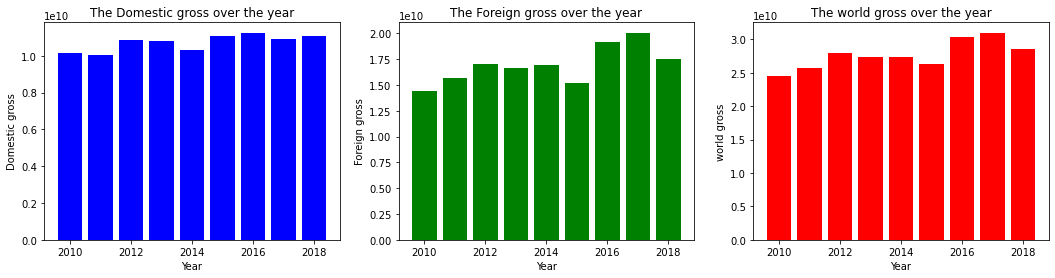

In [9]:
# Then I plot the bar of domestic and froeign gross seperately in two plots.
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (18, 4))
x = bom_movie_gross_groupby_year.index
y_d = bom_movie_gross_groupby_year['domestic_gross']
y_f = bom_movie_gross_groupby_year['foreign_gross']
y_w = bom_movie_gross_groupby_year['world_gross']
ax1.bar (x, y_d, color = "blue")
ax1.set_xlabel('Year')
ax1.set_ylabel('Domestic gross')
ax1.set_title('The Domestic gross over the year')
ax2.bar (x, y_f, color = 'green')
ax2.set_xlabel('Year')
ax2.set_ylabel('Foreign gross')
ax2.set_title('The Foreign gross over the year')
ax3.bar (x, y_w, color = 'red')
ax3.set_xlabel('Year')
ax3.set_ylabel('world gross')
ax3.set_title('The world gross over the year')
plt.show()

The graphs showed that, from 2010 to 2018, the total domestic gross did not change much. However, the froeign gross increased in general. Also, the total amount of froeign gross of all movies is almost two times larger than the domestic gross. 

# The second question
What is average rating as well as the gross earning for different category movies in histogram? 
#In order to get the movies rating and gross earning information, I selected data from IMDB_basics, IMDB_rating and bom_movie_gross. 

In [14]:
#As there is a lot of table joint in the next data processing, I will use SQL with Pandas.
#import the necessary library.
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [15]:
#The genres column contain one or more genres, I selected the first one as main genres. 
#Druing the split, I found some of them are empty, I then removed the genres which is empty. 
filtered_IMDB_basics =  IMDB_basics[IMDB_basics['genres'].notnull()]
main_genres = filtered_IMDB_basics['genres'].map(lambda x : x.split(',')[0])
filtered_IMDB_basics['main_genres']  = main_genres                                                         

<ipython-input-15-15e65f1e9867>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_IMDB_basics['main_genres']  = main_genres


In [16]:
filtered_IMDB_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,main_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action


In [ ]:
# Combined the filtered IMDB_basics and IMDB_rating with tconst for the year between 2010 and 2018 as there is only gross infomration
# for movies in these years. 
q =   """SELECT
            basic.tconst, basic.primary_title, basic.original_title, basic.main_genres, basic.start_year, rating.averagerating 
         FROM
            filtered_IMDB_basics basic
         INNER JOIN
            IMDB_rating rating
               ON basic.tconst = rating.tconst
         where   basic.start_year < 2019 AND  basic.start_year > 2009
         
               ;"""



In [22]:
combined_IMDB = pysqldf(q)
combined_IMDB.head(2)

,tconst,primary_title,original_title,main_genres,start_year,averagerating
0,tt0063540,Sunghursh,Sunghursh,Action,2013,7.0
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Drama,2018,6.9


In [23]:
# Continue to combine the upper table with bom_movie_gross using the title from bom_movie_gross to match the primary title 
# or original tile in IMDB.
# After combination, the number of rows decreased dramatically as the number of movies with gross is much less than the 
# number of movies in IMDB.
q2 = """SELECT
            IM.main_genres, bom.title, IM.averagerating,  bom.domestic_gross,
            bom.foreign_gross, bom.year, bom.world_gross
         FROM
            combined_IMDB IM
         INNER JOIN
            bom_movie_gross bom
               ON IM.primary_title = bom.title or IM.original_title = bom.title
         order by  world_gross desc
         
               ;"""


In [24]:
combined_IMDB_bom = pysqldf(q2)
# Remove the duplicates titles from the combinded table and order them by the gross earning worldwise
combined_IMDB_bom = combined_IMDB_bom.drop_duplicates(subset='title', keep="last")
combined_IMDB_bom.head(10)

,main_genres,title,averagerating,domestic_gross,foreign_gross,year,world_gross
0,Action,Avengers: Age of Ultron,7.3,459000000.0,946400000.0,2015,1.405400e+09
1,Action,Black Panther,7.3,700100000.0,646900000.0,2018,1.347000e+09
2,Action,Star Wars: The Last Jedi,7.1,620200000.0,712400000.0,2017,1.332600e+09
3,Action,Jurassic World: Fallen Kingdom,6.2,417700000.0,891800000.0,2018,1.309500e+09
6,Adventure,Frozen,7.5,400700000.0,875700000.0,2013,1.276400e+09
7,Action,Incredibles 2,7.7,608600000.0,634200000.0,2018,1.242800e+09
8,Action,Iron Man 3,7.2,409000000.0,805800000.0,2013,1.214800e+09
9,Adventure,Minions,6.4,336000000.0,823400000.0,2015,1.159400e+09
10,Action,Captain America: Civil War,7.8,408100000.0,745200000.0,2016,1.153300e+09
11,Action,Aquaman,7.1,335100000.0,812700000.0,2018,1.147800e+09


In the top 10 movies, 8 of them are action movies. This suggests that to focus on the high profit of the movies, selecting
action movies is a good choice.

In [252]:
#calculate the total earning of first 100 movies 
combined_IMDB_bom.loc[0:100,'world_gross'].sum()/ combined_IMDB_bom.loc[:,'world_gross'].sum()
#The number is 36.7%

0.369488361239297

Text(0, 0.5, 'world gross')

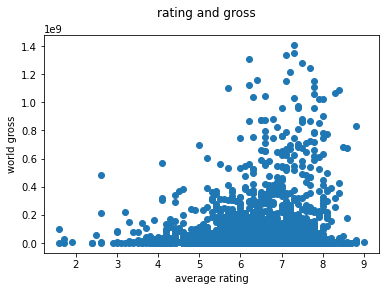

In [253]:
#plot the scatter point of average rating and world gross
X = combined_IMDB_bom.averagerating
Y = combined_IMDB_bom.world_gross
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('rating and gross')
plt.xlabel('average rating')
plt.ylabel('world gross')


The scatter of rating and gross earning for each movie from 2010 to 2018 shows that most of the high earning movie had high rating more than 6. The top 100 movies earned 36.9% of the gross of all the movies. 

# The third questions:
What is the total gross and rating of moives making in world for different genres? What is the distribution of top 100 movies which highest earned gross or highest rating. What is the number in 2018.

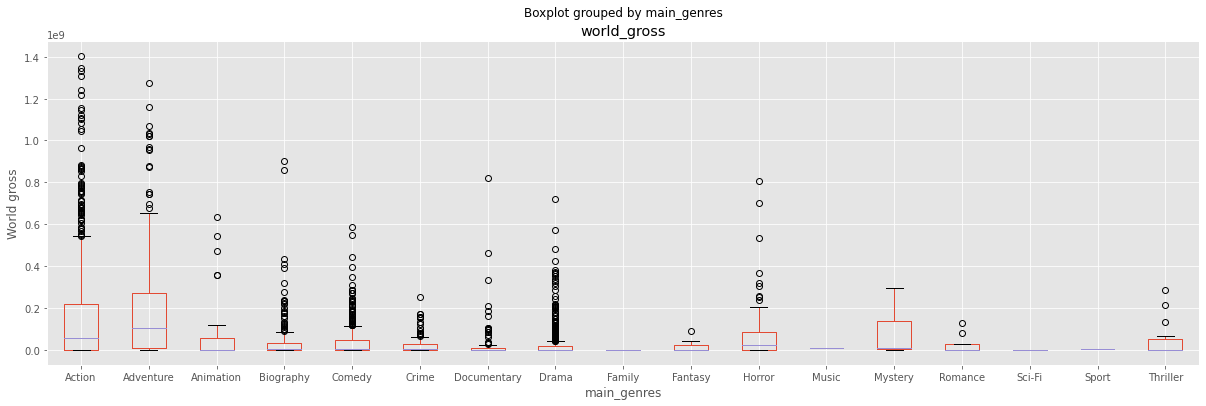

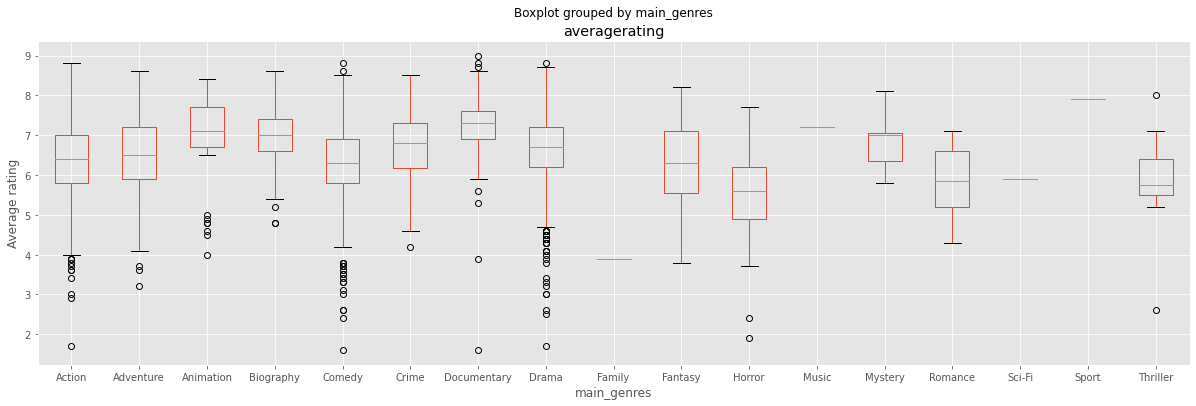

In [133]:
# Plot the box of gross and rating base on the different main genres of the movies
axes[0] = combined_IMDB_bom.boxplot((['world_gross']), by = 'main_genres', figsize = (20,6))
axes[1] = combined_IMDB_bom.boxplot((['averagerating']), by = 'main_genres', figsize = (20,6))
axes[0].set_ylabel('World gross')
axes[1].set_ylabel('Average rating')
plt.show()

The boxplot show that the medium value of world gross for each genres movies are similar with each other. However, in the Action and Adventure movies, there are quite few of the movies earned much more than other types of movies. For the average rating, there is no signaficant different types of movies are higher than others. This suggests that, there is more chance to earn more money if we select action and adventure movies. 

## Next: what is the ratio of genres in top 100 earning as well as the in top 100 rating

In [257]:
combined_IMDB_bom.head()

,main_genres,title,averagerating,domestic_gross,foreign_gross,year,world_gross
0,Action,Avengers: Age of Ultron,7.3,459000000.0,946400000.0,2015,1.405400e+09
1,Action,Black Panther,7.3,700100000.0,646900000.0,2018,1.347000e+09
2,Action,Star Wars: The Last Jedi,7.1,620200000.0,712400000.0,2017,1.332600e+09
3,Action,Jurassic World: Fallen Kingdom,6.2,417700000.0,891800000.0,2018,1.309500e+09
6,Adventure,Frozen,7.5,400700000.0,875700000.0,2013,1.276400e+09


In [261]:
# select the top 100 movies base on the gross
q3 = """SELECT *
         FROM
            combined_IMDB_bom c
         ORDER BY  c.world_gross desc
         limit 100  
         
               ;"""
combined_IMDB_bom_gross = pysqldf(q3)


In [259]:
combined_IMDB_bom_gross.head()

,main_genres,title,averagerating,domestic_gross,foreign_gross,year,world_gross
0,Action,Avengers: Age of Ultron,7.3,459000000.0,946400000.0,2015,1.405400e+09
1,Action,Black Panther,7.3,700100000.0,646900000.0,2018,1.347000e+09
2,Action,Star Wars: The Last Jedi,7.1,620200000.0,712400000.0,2017,1.332600e+09
3,Action,Jurassic World: Fallen Kingdom,6.2,417700000.0,891800000.0,2018,1.309500e+09
4,Adventure,Frozen,7.5,400700000.0,875700000.0,2013,1.276400e+09


In [263]:
# Count the number of movies for each genres
q5 = """SELECT c.main_genres, count(c.title) as count_gross
         FROM
            combined_IMDB_bom_gross c
         group BY  c.main_genres 
         
         ;"""
top_gross = pysqldf(q5)

top_gross

,main_genres,count_gross
0,Action,64
1,Adventure,25
2,Animation,2
3,Biography,2
4,Comedy,2
5,Documentary,1
6,Drama,2
7,Horror,2


In [266]:
# select the top 100 movies base on the rating

q4 = """SELECT *
         FROM
            combined_IMDB_bom c
         ORDER BY  c.averagerating desc
         limit 100  
         
               ;"""
combined_IMDB_bom_rating = pysqldf(q4)

In [267]:
# Count the number of movies for each genres

q6 = """SELECT c.main_genres, count(c.title) as count_rating
         FROM
            combined_IMDB_bom_rating c
         group BY  c.main_genres 
         
         ;"""
top_rating = pysqldf(q6)
top_rating

,main_genres,count_rating
0,Action,18
1,Adventure,8
2,Animation,2
3,Biography,15
4,Comedy,14
5,Crime,6
6,Documentary,10
7,Drama,24
8,Fantasy,1
9,Mystery,1


Text(0.5, 1.0, 'The percentage of genre in 100 highest rating movies')

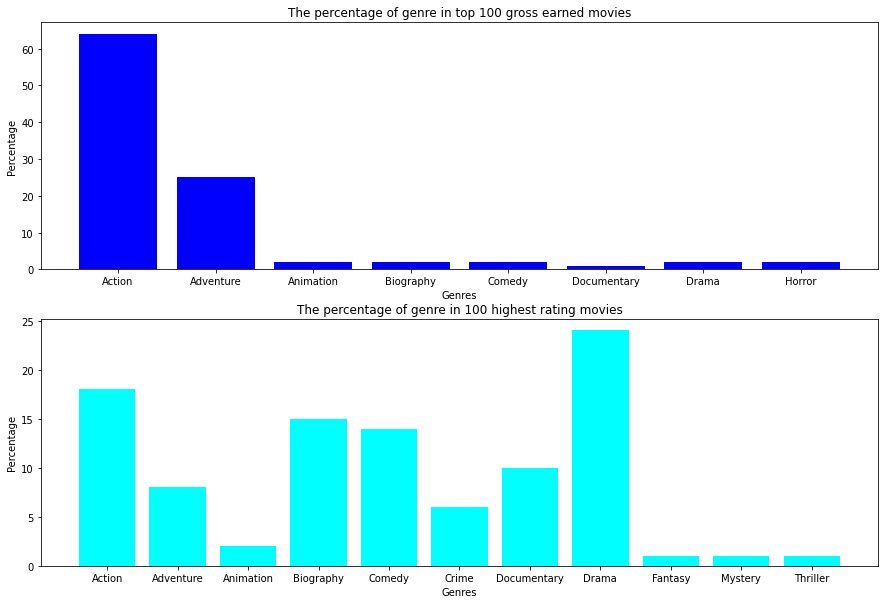

In [294]:
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize = (15, 10))
x = top_gross.main_genres
y  = top_gross['count_gross']

ax1.bar (x, y, color = "blue")
ax1.set_xlabel('Genres')
ax1.set_ylabel('Percentage')
ax1.set_title('The percentage of genre in top 100 gross earned movies')

x_r = top_rating.main_genres
y_rating  = top_rating['count_rating']
ax2.bar (x_r, y_rating, color = "cyan")
ax2.set_xlabel('Genres')
ax2.set_ylabel('Percentage')
ax2.set_title('The percentage of genre in 100 highest rating movies')

In [ ]:
#What is the world gross and rating of different Genres for the movies in 2018

In [284]:
# select total gross and average rating for all the movies in 2018 and group by geres
q7 = """SELECT main_genres, title, sum(world_gross) as gross_2018, AVG(averagerating) as rating_2018
         FROM
            combined_IMDB_bom c
         WHERE c.year = 2018
         group by c.main_genres
         ORDER BY  c.world_gross desc
         
         
               ;"""
combined_IMDB_bom_gross_2018 = pysqldf(q7)
combined_IMDB_bom_gross_2018

,main_genres,title,gross_2018,rating_2018
0,Action,Black Panther,1.378821e+10,6.414286
1,Biography,Bohemian Rhapsody,1.802362e+09,6.684848
2,Adventure,Fantastic Beasts: The Crimes of Grindelwald,3.692320e+09,6.262500
3,Comedy,Mamma Mia! Here We Go Again,1.838592e+09,6.105405
4,Drama,Fifty Shades Freed,1.347703e+09,6.735185
5,Horror,The Nun,6.900150e+08,5.516667
6,Crime,The Mule,3.362771e+08,7.040000
7,Documentary,First Man,1.620930e+08,7.785714
8,Romance,How Long Will I Love U,8.341400e+07,6.700000
9,Animation,Monster Family,2.650180e+07,5.900000


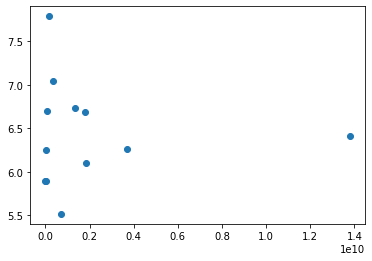

In [286]:
plt.scatter(combined_IMDB_bom_gross_2018.gross_2018, combined_IMDB_bom_gross_2018.rating_2018 )

Text(0.5, 1.0, 'The rating of different Genres for the movies in 2018')

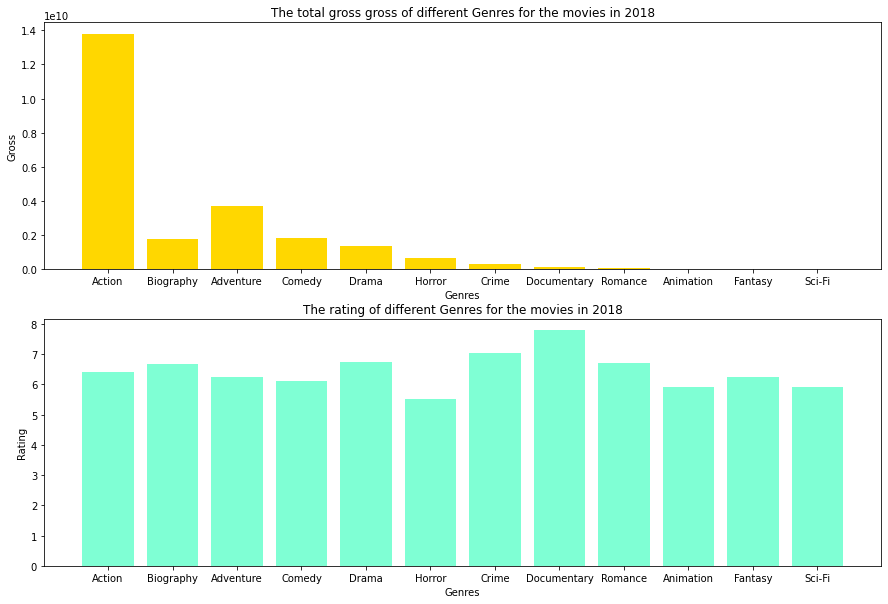

In [289]:
X = combined_IMDB_bom_gross_2018.main_genres
Y_gross = combined_IMDB_bom_gross_2018.gross_2018
Y_rating = combined_IMDB_bom_gross_2018.rating_2018
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize = (15, 10))

ax1.bar (X, Y_gross, color = "gold")
ax1.set_xlabel('Genres')
ax1.set_ylabel('Gross')
ax1.set_title('The total gross gross of different Genres for the movies in 2018')

x_r = top_rating.main_genres
y_rating  = top_rating['count_rating']
ax2.bar (X, Y_rating, color = "aquamarine")
ax2.set_xlabel('Genres')
ax2.set_ylabel('Rating')
ax2.set_title('The rating of different Genres for the movies in 2018')